Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

Generate data from a sinusoidal function

In [2]:
np.random.seed(42)
x = np.linspace(-1, 1, 100)
y_true = np.sin(2 * np.pi * x)  # True function

Add noise to the data

In [3]:
y_noisy = y_true + np.random.normal(0, 0.15, size=y_true.shape)

Plot the true function

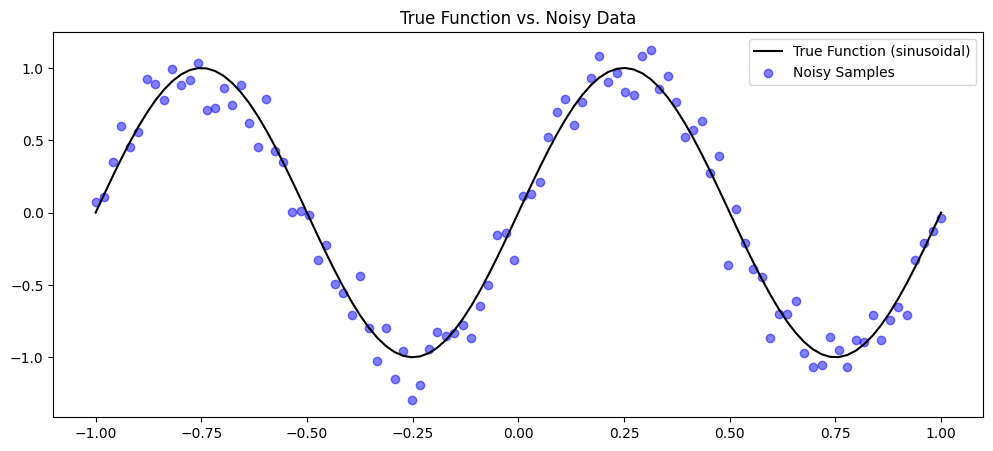

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(x, y_true, 'k', label='True Function (sinusoidal)')
plt.scatter(x, y_noisy, color='blue', alpha=0.5, label='Noisy Samples')
plt.title('True Function vs. Noisy Data')
plt.legend()
plt.show()

Function to generate models

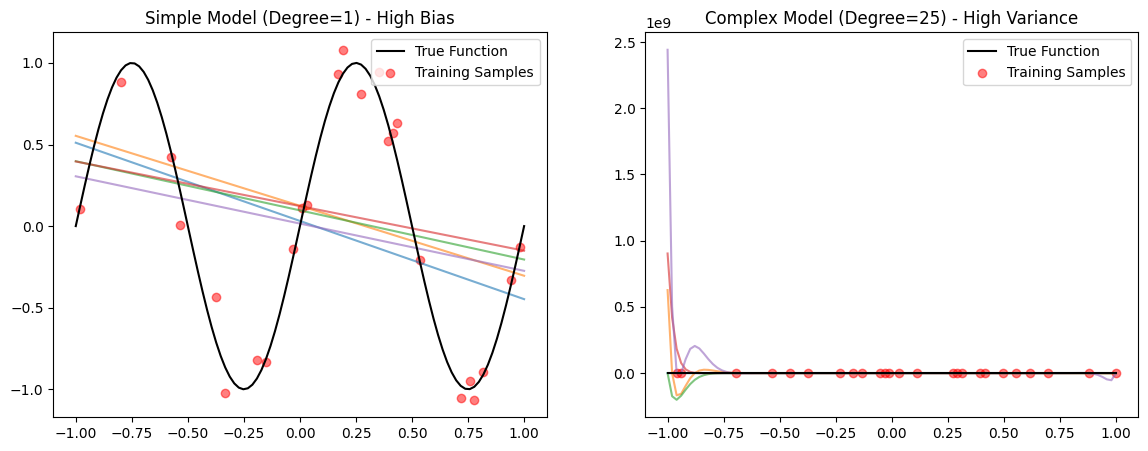

In [6]:
def plot_models(degree, ax, title):
    """Plot polynomial regression models of given degree."""
    for _ in range(5):  # Train multiple models to show variance
        sample_indices = np.random.choice(range(100), 25, replace=False)
        x_sample, y_sample = x[sample_indices], y_noisy[sample_indices]

        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_sample.reshape(-1, 1), y_sample)
        y_pred = model.predict(x.reshape(-1, 1))

        ax.plot(x, y_pred, alpha=0.6)

    ax.plot(x, y_true, 'k', label='True Function')
    ax.scatter(x_sample, y_sample, color='red', alpha=0.5, label='Training Samples')
    ax.set_title(title)
    ax.legend()

# Create subplots to compare models
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_models(1, axs[0], 'Simple Model (Degree=1) - High Bias')
plot_models(25, axs[1], 'Complex Model (Degree=25) - High Variance')
plt.show()

Bias-Variance decomposition visualization

In [11]:
x_test = np.linspace(-1, 1, 100)
y_pred_simple = []
y_pred_complex = []

for _ in range(50):  # Train multiple models to compute bias-variance
    sample_indices = np.random.choice(range(100), 25, replace=False)
    x_sample, y_sample = x[sample_indices], y_noisy[sample_indices]

    simple_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
    complex_model = make_pipeline(PolynomialFeatures(25), LinearRegression())

    simple_model.fit(x_sample.reshape(-1, 1), y_sample)
    complex_model.fit(x_sample.reshape(-1, 1), y_sample)

    y_pred_simple.append(simple_model.predict(x_test.reshape(-1, 1)))
    y_pred_complex.append(complex_model.predict(x_test.reshape(-1, 1)))

Compute mean and variance

In [12]:
simple_mean = np.mean(y_pred_simple, axis=0)
simple_variance = np.var(y_pred_simple, axis=0)
complex_mean = np.mean(y_pred_complex, axis=0)
complex_variance = np.var(y_pred_complex, axis=0)

Bias-Variance decomposition:

    Bias measures how far the average predicted value is from the true function.
    Variance measures how much the predictions fluctuate for different training sets.

        Bias formula: Bias^2 = (E[f_hat(x)] - f(x))^2
        Variance formula: Variance = E[(f_hat(x) - E[f_hat(x)])^2]

Plot bias-variance visualization

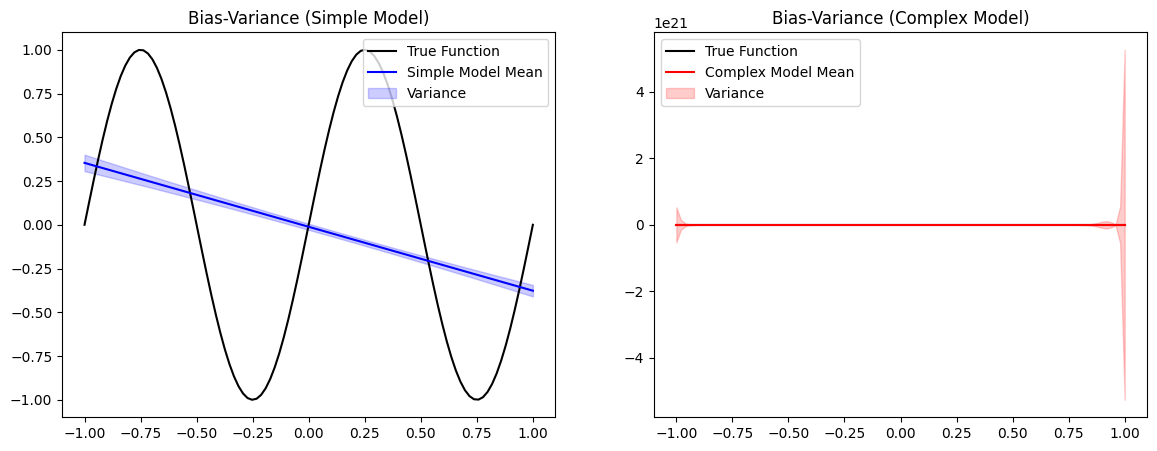

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(x_test, y_true, 'k', label='True Function')
axs[0].plot(x_test, simple_mean, 'b', label='Simple Model Mean')
axs[0].fill_between(x_test, simple_mean - simple_variance, simple_mean + simple_variance, color='b', alpha=0.2, label='Variance')
axs[0].set_title('Bias-Variance (Simple Model)')
axs[0].legend()

axs[1].plot(x_test, y_true, 'k', label='True Function')
axs[1].plot(x_test, complex_mean, 'r', label='Complex Model Mean')
axs[1].fill_between(x_test, complex_mean - complex_variance, complex_mean + complex_variance, color='r', alpha=0.2, label='Variance')
axs[1].set_title('Bias-Variance (Complex Model)')
axs[1].legend()
plt.show()